# 2024 Winter Introduction to Deep Learning
### Based on Prof. Oh's Youtube Lecture
https://youtube.com/playlist?list=PLvbUC2Zh5oJvByu9KL82bswYT2IKf0K1M

> Assignment #7


*   Youtube Lecture #27-31
*   Written by Seungeun Lee

## 1. Recurrent Neural Network [RNN]
*     Reference. https://data-science.tistory.com/67

In [1]:
import torch
import torch.nn as nn

In [2]:
input_size = 5
hidden_size = 8

In [3]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [4]:
cell = nn.RNN(input_size, hidden_size, batch_first=True) # defines the RNN architecture
# batch_first = True -> indicates that the first dimension stands for the batch size
# if False, the input should be (10, 5), i.e. (time_steps, input_size), getting rid of the batch_size

In [5]:
outputs, _status = cell(inputs)

In [6]:
print(outputs.shape) # hidden_state of every time step (8-dim hidden_state for 10 time steps)

torch.Size([1, 10, 8])


In [7]:
print(_status.shape) # hidden_state of the final layer only (8-dim hidden_state for 1 time step)

torch.Size([1, 1, 8])


In [8]:
# Deeper RNN
# (batch_size, time_steps, input_size)
inputs2 = torch.Tensor(1, 10, 5)
cell2 = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True) # num_layers = 2 -> deeper RNN (default: 1)
outputs2, _status2 = cell2(inputs2)
print(outputs2.shape) # hidden_state of every time step (8-dim hidden_state for 10 time steps) -> only returns the last layer
print(_status2.shape) # hidden_state of the final layer only (8-dim hidden_state for 1 time step) -> returns the output for all 2 layers

torch.Size([1, 10, 8])
torch.Size([2, 1, 8])


In [9]:
# Deeper RNN
# (batch_size, time_steps, input_size)
inputs3 = torch.Tensor(1, 10, 5)
cell3 = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 3, batch_first=True) # num_layers = 3 -> deeper RNN (default: 1)
outputs3, _status3 = cell3(inputs3)
print(outputs3.shape) # hidden_state of every time step (8-dim hidden_state for 10 time steps) -> only returns the last layer
print(_status3.shape) # hidden_state of the final layer only (8-dim hidden_state for 1 time step) -> returns the output for all 3 layers

torch.Size([1, 10, 8])
torch.Size([3, 1, 8])


## 2. Long Short Term Memory [LSTM]

In [10]:
# Deeper LSTM -- we only need to change nn.RNN into nn.LSTM
# (batch_size, time_steps, input_size)
inputs4 = torch.Tensor(1, 10, 5)
cell4 = nn.LSTM(input_size = 5, hidden_size = 8, num_layers = 4, batch_first=True) # num_layers = 4 -> deeper LSTM (default: 1)
outputs4, (h4, c4) = cell4(inputs4)
print(outputs4.shape) # hidden_state of every time step (8-dim hidden_state for 10 time steps) -> only returns the last layer
print(h4.shape) # hidden_state of the final layer only (8-dim hidden_state for 1 time step) -> returns the output for all 4 layers
print(c4.shape) # cell state of the final layer only (8-dim hidden_state for 1 time step) -> returns the output for all 4 layers

torch.Size([1, 10, 8])
torch.Size([4, 1, 8])
torch.Size([4, 1, 8])


### Question 1.
### Write a code for LSTM having 10 internal layers (num_layers = 10) and change the input size into (5, 50, 5). Please stick to the format provided. Check if the size of the output, hidden, and cell state are calculated properly.

In [11]:
input = torch.Tensor(5, 50, 5) # (batch size, time step, input size)
cell = nn.LSTM(input_size = 5, hidden_size = 8, num_layers = 10, batch_first=True)
output, (h, c) = cell(input)
print(output.shape)
print(h.shape)
print(c.shape)

torch.Size([5, 50, 8])
torch.Size([10, 5, 8])
torch.Size([10, 5, 8])


### Question 2. Describe the limiations of (Vanilla) RNN and how LSTM overcomes these limitations.

## Vanilla RNN의 한계점
### 1. backpropagation을 하는 과정에서 기울기의 값이 1 이하이기 때문에 gradient vanishing problem이 나타난다.
### 2. feed-forward를 하는 과정에서 time-step이 뒤로 갈수록 맨 앞의 정보가 손실되는 long-term dependency 문제가 발생하게 된다.

## LSTM이 RNN의 문제를 극복한 방법
### 1. LSTM은 원래 RNN 구조에 여러 gate를 추가하여 RNN의 단점을 극복한 모델입니다. 여러 gate가 추가 되었는데, 추가된 gate는 다음과 같습니다.
#### 1) input gate : input gate는 현재 time step에 입력된 값에 얼마나 가중치를 줄 것인지 결정하는 gate입니다.
#### 2) forget gate : forget gate는 이전 cell state의 정보를 얼마나 잊을지 결정하는 gate 입니다.
#### 3) output gate : output gate는 다음 은닉층의 값으로 얼마나 정보를 줄지 결정하는 gate 입니다.
#### 4) gate gate : 이는 RNN에서 했던 기본 연산과 동일한 연산입니다.
#### 5) cell state : forget gate와 이전의 cell state를 곱해주고, input gate와 gate gate를 곱해준 두 값을 더해주어 계산합니다.

### 2. LSTM은 1과 같은 구조를 이용하여 RNN에서 발생한 long-term dependency 문제를 해결할 수 있습니다.
### 3. 또한, cell state를 이용하여 LSTM은 backpropagation에서 기울기가 감소 또는 매우 커지는 현상을 막을 수 있습니다.

## 3. Gated Recurrent Unit [GRU]

### Question 3.
### Write a code for GRU having 5 internal layers (num_layers = 5) and change the input size into (3, 45, 7). (Change the input_size adequately) Please stick to the format provided. Check if the size of output and hidden state are calculated properly.
### Hint: https://pytorch.org/docs/stable/generated/torch.nn.GRU.html Its implementation is similar to that of RNN.

In [12]:
input_g = torch.Tensor(3, 45, 7) # (batch size, time step, input size)
cell_g = nn.GRU(input_size = 7, hidden_size = 8, num_layers = 5, batch_first=True)
output_g, h_g = cell_g(input_g)
print(output_g.shape)
print(h_g.shape)

torch.Size([3, 45, 8])
torch.Size([5, 3, 8])


## 4. On your Own

### **Question 4. Choose one or two from the following documents:**


*    **News topic Classification with RNN:** https://glanceyes.com/entry/PyTorch%EB%A1%9C-RNN-%EB%AA%A8%EB%8D%B8-%EA%B5%AC%ED%98%84%ED%95%B4%EB%B3%B4%EA%B8%B0-AG-NEWS-%EB%89%B4%EC%8A%A4-%EA%B8%B0%EC%82%AC-%EC%A3%BC%EC%A0%9C-%EB%B6%84%EB%A5%98
*    **NAVER Movie Review Classification with LSTM:** https://wikidocs.net/217687
*   **IMDB Review Classification with GRU:** https://wikidocs.net/217083

#### Read it and run the whole code. Write a simplified explanation for each cell.


Note. https://wikidocs.net/book/2788 and https://wikidocs.net/book/2155 provide lots of interesting codes!

## 1. GRU를 이용한 IMDB 리뷰 분류

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk # 기본적인 자연어 처리를 위한 라이브러리
import torch
import urllib.request # 데이터 셋을 불러오기 위한 url 관련 라이브러리
from tqdm import tqdm # 반복문에서 진행률을 prograss bar로 표현해주고 남은 시간 정보를 알려주는 라이브러리
from collections import Counter
from nltk.tokenize import word_tokenize # 언어 토큰화를 하기 위한 라이브러리
from sklearn.model_selection import train_test_split # 데스트 데이터와 트레인 데이터를 나누기 위한 라이브러리

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/pytorch-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/IMDB%20Dataset.csv", filename="IMDB Dataset.csv")
# IMDB 데이터 셋을 불러오는 코드

('IMDB Dataset.csv', <http.client.HTTPMessage at 0x782d6ff887c0>)

In [16]:
df = pd.read_csv('IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [18]:
print('결측치 여부:', df.isnull().values.any())

결측치 여부: False


In [19]:
df['sentiment'] = df['sentiment'].replace(['positive','negative'],[1, 0])
df.head()
# positive와 negative로 이루어져 있는 레이블을 1과 0으로 변환해주는 코드이다.

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [20]:
X_data = df['review']
y_data = df['sentiment']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.5, random_state=0, stratify=y_data)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.2, random_state=0, stratify=y_train)

print('--------훈련 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')
print('--------검증 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_valid.value_counts()[0]/len(y_valid) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_valid.value_counts()[1]/len(y_valid) * 100,3)}%')
print('--------테스트 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')
# train_test_split 함수를 이용하여 train, validation, test 데이터 셋을 나누는 코드


--------훈련 데이터의 비율-----------
부정 리뷰 = 50.0%
긍정 리뷰 = 50.0%
--------검증 데이터의 비율-----------
부정 리뷰 = 50.0%
긍정 리뷰 = 50.0%
--------테스트 데이터의 비율-----------
부정 리뷰 = 50.0%
긍정 리뷰 = 50.0%


In [22]:
def tokenize(sentences):
  tokenized_sentences = []
  for sent in tqdm(sentences):
    tokenized_sent = word_tokenize(sent) # 워드 토큰화 진행
    tokenized_sent = [word.lower() for word in tokenized_sent] # 토큰화한 단어를 소문자로 변환
    tokenized_sentences.append(tokenized_sent) # 토큰화한 단어를 문장 배열에 넣어줌
  return tokenized_sentences

tokenized_X_train = tokenize(X_train)
tokenized_X_valid = tokenize(X_valid)
tokenized_X_test = tokenize(X_test)

100%|██████████| 25000/25000 [00:41<00:00, 604.63it/s]


In [23]:
# 토큰화된 샘플을 2개 출력하는 코드
for sent in tokenized_X_train[:2]:
  print(sent)

['have', 'you', 'ever', ',', 'or', 'do', 'you', 'have', ',', 'a', 'pet', 'who', "'s", 'been', 'with', 'you', 'through', 'thick', 'and', 'thin', ',', 'who', 'you', "'d", 'be', 'lost', 'without', ',', 'and', 'who', 'you', 'love', 'no', 'matter', 'what', '?', 'betcha', 'never', 'thought', 'they', 'feel', 'the', 'same', 'way', 'about', 'you', '!', '<', 'br', '/', '>', '<', 'br', '/', '>', 'wonderful', ',', 'wonderful', 'family', 'film', '.', 'if', 'you', 'have', 'a', 'soft', 'spot', 'for', 'animals', ',', 'this', 'is', 'guaranteed', 'to', 'make', 'you', 'cry', 'no', 'matter', 'your', 'age', '.', 'i', 'used', 'to', 'watch', 'this', 'movie', 'all', 'the', 'time', 'when', 'i', 'was', 'a', 'little', 'kid', ',', 'and', 'i', 'find', 'that', 'now', ',', 'at', 'age', 'sixteen', ',', 'i', 'love', 'it', 'as', 'much', 'as', 'i', 'did', 'then', '.', 'i', 'could', 'never', 'decide', 'on', 'a', 'favorite', 'character', 'then', ',', 'and', 'i', 'still', 'do', "n't", 'think', 'i', 'can', '!', 'i', 'love',

In [24]:
word_list = []
for sent in tokenized_X_train:
    for word in sent:
      word_list.append(word)

word_counts = Counter(word_list)
print('총 단어수 :', len(word_counts))
# 토큰화 된 훈련 데이터로부터 정수 인코딩을 하기 위핸서 데이터에 존재하는
# 단어 종류의 총 개수와 각 단어에 대한 등장 빈도를 카운트 하는 코드이다.

총 단어수 : 100586


In [25]:
print('훈련 데이터에서의 단어 the의 등장 횟수 :', word_counts['the'])
print('훈련 데이터에서의 단어 love의 등장 횟수 :', word_counts['love'])

훈련 데이터에서의 단어 the의 등장 횟수 : 265697
훈련 데이터에서의 단어 love의 등장 횟수 : 4984


In [26]:
vocab = sorted(word_counts, key=word_counts.get, reverse=True)
print('등장 빈도수 상위 10개 단어')
print(vocab[:10])

등장 빈도수 상위 10개 단어
['the', ',', '.', 'a', 'and', 'of', 'to', 'is', '/', '>']


In [27]:
threshold = 3
total_cnt = len(word_counts) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 100586
등장 빈도가 2번 이하인 희귀 단어의 수: 61877
단어 집합에서 희귀 단어의 비율: 61.51651323245779
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.3294254426463437


In [28]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
vocab_size = total_cnt - rare_cnt
vocab = vocab[:vocab_size]
print('단어 집합의 크기 :', len(vocab))

단어 집합의 크기 : 38709


In [29]:
word_to_index = {}
word_to_index['<PAD>'] = 0
word_to_index['<UNK>'] = 1

for index, word in enumerate(vocab) :
  word_to_index[word] = index + 2

vocab_size = len(word_to_index)
print('패딩 토큰과 UNK 토큰을 고려한 단어 집합의 크기 :', vocab_size)
# 패딩 토큰인 <PAD>에는 정수 0을 할당시켜 준다.
# 모르는 단어 즉, OOV(Out Of Vocabulary)가 발생할 경우를 대비하여 <UNK> 토큰에 정수 1을 할당시켜 준다.
# 나머지 단어에도 각각의 정수를 할당해준다.

패딩 토큰과 UNK 토큰을 고려한 단어 집합의 크기 : 38711


In [30]:
def texts_to_sequences(tokenized_X_data, word_to_index):
  encoded_X_data = []
  for sent in tokenized_X_data:
    index_sequences = []
    for word in sent:
      try:
          index_sequences.append(word_to_index[word])
      except KeyError:
          index_sequences.append(word_to_index['<UNK>'])
    encoded_X_data.append(index_sequences)
  return encoded_X_data

encoded_X_train = texts_to_sequences(tokenized_X_train, word_to_index)
encoded_X_valid = texts_to_sequences(tokenized_X_valid, word_to_index)
encoded_X_test = texts_to_sequences(tokenized_X_test, word_to_index)
# word_to_index 함수를 이용하여 데이터를 정수 인코딩 해주는 코드이다.

In [31]:
# 정수 인코딩이 진행된 학습 데이터의 샘플 2개를 출력하는 코드
for sent in encoded_X_train[:2]:
  print(sent)

[38, 29, 140, 3, 52, 54, 29, 38, 3, 5, 3406, 47, 19, 95, 22, 29, 161, 4059, 6, 1741, 3, 47, 29, 293, 39, 469, 218, 3, 6, 47, 29, 134, 71, 532, 61, 59, 25184, 130, 214, 44, 249, 2, 189, 114, 58, 29, 41, 12, 13, 10, 11, 12, 13, 10, 11, 384, 3, 384, 253, 26, 4, 57, 29, 38, 5, 2280, 1587, 23, 1477, 3, 17, 9, 5775, 8, 111, 29, 1440, 71, 532, 141, 677, 4, 16, 343, 8, 126, 17, 24, 43, 2, 75, 63, 16, 20, 5, 137, 538, 3, 6, 16, 172, 18, 164, 3, 42, 677, 12075, 3, 16, 134, 14, 21, 89, 21, 16, 83, 110, 4, 16, 94, 130, 1124, 30, 5, 494, 121, 110, 3, 6, 16, 145, 54, 31, 120, 16, 73, 41, 16, 134, 43, 301, 7, 2, 1477, 4, 2, 425, 204, 66, 168, 6, 3964, 3, 50, 5, 1961, 3, 25, 19699, 253, 4, 16, 54, 134, 580, 3, 6, 105, 42, 2, 152, 36, 544, 18, 36, 55, 5, 253, 42, 247, 4, 933, 3, 421, 3, 25, 40, 227, 407, 18, 17, 9, 965, 8, 39, 5, 253, 26, 3, 6, 14, 17326, 18, 233, 872, 4, 8000, 55, 53, 2, 416, 4967, 7, 33, 1, 32, 6, 2669, 9, 2, 416, 1, 2144, 8, 2, 208, 3, 8988, 13008, 12, 13, 10, 11, 12, 13, 10, 11, 2,

리뷰의 최대 길이 : 2818
리뷰의 평균 길이 : 279.1958


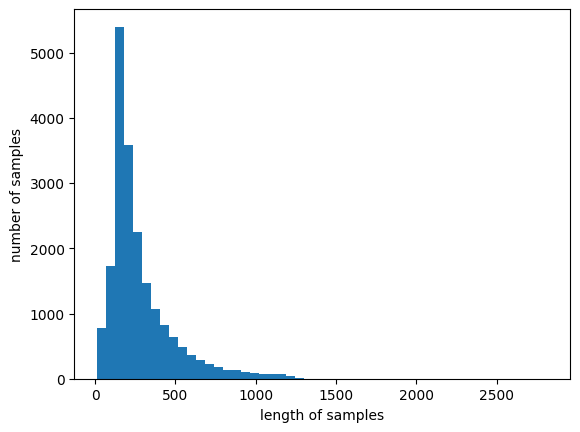

In [32]:
print('리뷰의 최대 길이 :',max(len(review) for review in encoded_X_train))
print('리뷰의 평균 길이 :',sum(map(len, encoded_X_train))/len(encoded_X_train))
plt.hist([len(review) for review in encoded_X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()
# 서로 다른 길이의 데이터들을 동일한 길이로 일치시켜주는 패딩 작업을 진행해야 한다.
# 이를 위해서 훈련 데이터의 최대 길이, 평균 길이, 데이터의 길이 분포를 확인하는 코드이다.

In [33]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))
# 모델이 처리할 수 있도록 데이터릐 길이를 일정하게 만들어 주어야 한다.
# 특정 길이 변수를 max_len으로 정하고, 대부분의 리뷰 내용이 잘리지 않도록 할 수 있는 최적의
# max_len을 찾기 위해서 전체 샘플 중 길이가 max_len 이하인 샘플이 비율이 얼마인지 출력해주는 함수를 이용하여 확인해준다.

In [34]:
max_len = 500
below_threshold_len(max_len, encoded_X_train)
# max_len을 500으로 할 경우 약 87%의 샘플이 그대로 보존되는 것을 볼 수 있다.

전체 샘플 중 길이가 500 이하인 샘플의 비율: 87.795


In [35]:
def pad_sequences(sentences, max_len):
  features = np.zeros((len(sentences), max_len), dtype=int)
  for index, sentence in enumerate(sentences):
    if len(sentence) != 0:
      features[index, :len(sentence)] = np.array(sentence)[:max_len]
  return features

padded_X_train = pad_sequences(encoded_X_train, max_len=max_len)
padded_X_valid = pad_sequences(encoded_X_valid, max_len=max_len)
padded_X_test = pad_sequences(encoded_X_test, max_len=max_len)

print('훈련 데이터의 크기 :', padded_X_train.shape)
print('검증 데이터의 크기 :', padded_X_valid.shape)
print('테스트 데이터의 크기 :', padded_X_test.shape)
# 위에서 정한 max_len = 500과 pad_sequneces 함수를 정의하여 모든 데이터의 길이를 500으로 맞춰주는 코드이다.

훈련 데이터의 크기 : (20000, 500)
검증 데이터의 크기 : (5000, 500)
테스트 데이터의 크기 : (25000, 500)


In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [37]:
USE_CUDA = torch.cuda.is_available() # GPU 사용이 가능한지 확인하는 코드이다.
device = torch.device("cuda" if USE_CUDA else "cpu")
print("cpu와 cuda 중 다음 기기로 학습함:", device)

cpu와 cuda 중 다음 기기로 학습함: cuda


In [38]:
train_label_tensor = torch.tensor(np.array(y_train))
valid_label_tensor = torch.tensor(np.array(y_valid))
test_label_tensor = torch.tensor(np.array(y_test))
print(train_label_tensor[:5])

tensor([1, 1, 0, 0, 0])


In [39]:
class TextClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(TextClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim) # output_dim = 분류하고자하는 카테고리의 개수

    def forward(self, x):
        # x: (batch_size, seq_length) == (32, 500)
        embedded = self.embedding(x)  # (batch_size, seq_length, embedding_dim) == (32, 500, 100) == (데이터의 개수, 문장길이, 단어 벡터의 차원)
        gru_out, hidden = self.gru(embedded)  # gru_out: (batch_size, seq_length, hidden_dim), hidden: (1, batch_size, hidden_dim)
        last_hidden = hidden.squeeze(0)  # (batch_size, hidden_dim)
        logits = self.fc(last_hidden)  # (batch_size, output_dim)
        return logits

In [40]:
encoded_train = torch.tensor(padded_X_train).to(torch.int64)
train_dataset = torch.utils.data.TensorDataset(encoded_train, train_label_tensor)
train_dataloader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=32)

encoded_test = torch.tensor(padded_X_test).to(torch.int64)
test_dataset = torch.utils.data.TensorDataset(encoded_test, test_label_tensor)
test_dataloader = torch.utils.data.DataLoader(test_dataset, shuffle=True, batch_size=1)

encoded_valid = torch.tensor(padded_X_valid).to(torch.int64)
valid_dataset = torch.utils.data.TensorDataset(encoded_valid, valid_label_tensor)
valid_dataloader = torch.utils.data.DataLoader(valid_dataset, shuffle=True, batch_size=1)

In [41]:
total_batch = len(train_dataloader)
print('총 배치의 수 : {}'.format(total_batch))
# 배치의 개수를 32개로 설정했기 때문에 20000/32 = 625 이다.

총 배치의 수 : 625


In [42]:
embedding_dim = 100
hidden_dim = 128 # hidden layer의 dimension을 128로 설정해준다.
output_dim = 2 # 1과 0을 분류하는 모델이므로 output dimension을 2로 설정해준다.
learning_rate = 0.01
num_epochs = 10

model = TextClassifier(vocab_size, embedding_dim, hidden_dim, output_dim)
model.to(device) # 모델의 객체를 선언하는 코드이다.

TextClassifier(
  (embedding): Embedding(38711, 100)
  (gru): GRU(100, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=2, bias=True)
)

In [43]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [44]:
def calculate_accuracy(logits, labels):
    # _, predicted = torch.max(logits, 1)
    predicted = torch.argmax(logits, dim=1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

In [45]:
def evaluate(model, valid_dataloader, criterion, device):
    val_loss = 0
    val_correct = 0
    val_total = 0

    model.eval()
    with torch.no_grad():
        # 데이터로더로부터 배치 크기만큼의 데이터를 연속으로 로드
        for batch_X, batch_y in valid_dataloader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            # 모델에 입력값을 넣어서 모델의 예측값을 계산한다.
            logits = model(batch_X)

            # 위에서 정한 손실함수를 이용하여 손실값을 계산한다.
            loss = criterion(logits, batch_y)

            # 정확도와 손실을 계산함
            val_loss += loss.item()
            val_correct += calculate_accuracy(logits, batch_y) * batch_y.size(0)
            val_total += batch_y.size(0)

    val_accuracy = val_correct / val_total
    val_loss /= len(valid_dataloader)

    return val_loss, val_accuracy

In [46]:
num_epochs = 5

# Training loop
best_val_loss = float('inf')

# Training loop
for epoch in range(num_epochs):
    # Training
    train_loss = 0
    train_correct = 0
    train_total = 0
    model.train()
    for batch_X, batch_y in train_dataloader:
        # Forward pass
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        # batch_X.shape == (batch_size, max_len)
        logits = model(batch_X)

        # Compute loss
        loss = criterion(logits, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate training accuracy and loss
        train_loss += loss.item()
        train_correct += calculate_accuracy(logits, batch_y) * batch_y.size(0)
        train_total += batch_y.size(0)

    train_accuracy = train_correct / train_total
    train_loss /= len(train_dataloader)

    # Validation
    val_loss, val_accuracy = evaluate(model, valid_dataloader, criterion, device)

    print(f'Epoch {epoch+1}/{num_epochs}:')
    print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

    # 검증 손실이 최소일 때 체크포인트 저장
    if val_loss < best_val_loss:
        print(f'Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. 체크포인트를 저장합니다.')
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model_checkpoint.pth')

Epoch 1/5:
Train Loss: 0.6964, Train Accuracy: 0.5072
Validation Loss: 0.6925, Validation Accuracy: 0.5090
Validation loss improved from inf to 0.6925. 체크포인트를 저장합니다.
Epoch 2/5:
Train Loss: 0.6904, Train Accuracy: 0.5170
Validation Loss: 0.7010, Validation Accuracy: 0.5104
Epoch 3/5:
Train Loss: 0.6756, Train Accuracy: 0.5485
Validation Loss: 0.6886, Validation Accuracy: 0.5358
Validation loss improved from 0.6925 to 0.6886. 체크포인트를 저장합니다.
Epoch 4/5:
Train Loss: 0.5892, Train Accuracy: 0.6896
Validation Loss: 0.5361, Validation Accuracy: 0.7488
Validation loss improved from 0.6886 to 0.5361. 체크포인트를 저장합니다.
Epoch 5/5:
Train Loss: 0.4372, Train Accuracy: 0.8062
Validation Loss: 0.4284, Validation Accuracy: 0.8106
Validation loss improved from 0.5361 to 0.4284. 체크포인트를 저장합니다.


In [47]:
# 모델 로드
model.load_state_dict(torch.load('best_model_checkpoint.pth'))

# 모델을 device에 올립니다.
model.to(device)

TextClassifier(
  (embedding): Embedding(38711, 100)
  (gru): GRU(100, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=2, bias=True)
)

In [48]:
# 검증 데이터에 대한 정확도와 손실 계산하는 코드
val_loss, val_accuracy = evaluate(model, valid_dataloader, criterion, device)

print(f'Best model validation loss: {val_loss:.4f}')
print(f'Best model validation accuracy: {val_accuracy:.4f}')

Best model validation loss: 0.4284
Best model validation accuracy: 0.8106


In [49]:
# 테스트 데이터에 대한 정확도와 손실 계산하는 코드
test_loss, test_accuracy = evaluate(model, test_dataloader, criterion, device)

print(f'Best model test loss: {test_loss:.4f}')
print(f'Best model test accuracy: {test_accuracy:.4f}')

Best model test loss: 0.4352
Best model test accuracy: 0.8150


In [50]:
index_to_tag = {0 : '부정', 1 : '긍정'}

def predict(text, model, word_to_index, index_to_tag):
    # 모델 평가 모드
    model.eval()

    # 토큰화 및 정수 인코딩. OOV 문제 발생 시 <UNK> 토큰에 해당하는 인덱스 1 할당
    tokens = word_tokenize(text)
    token_indices = [word_to_index.get(token.lower(), 1) for token in tokens]

    # 리스트를 텐서로 변경
    input_tensor = torch.tensor([token_indices], dtype=torch.long).to(device)  # (1, seq_length)

    # 모델의 예측
    with torch.no_grad(): # 기울기 값을 계산하지 않도록 설정해주는 코드이다.
        logits = model(input_tensor)  # (1, output_dim)

    # 레이블 인덱스 예측
    _, predicted_index = torch.max(logits, dim=1)  # (1,)

    # 인덱스와 매칭되는 카테고리 문자열로 변경
    predicted_tag = index_to_tag[predicted_index.item()]

    return predicted_tag

In [51]:
test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

predict(test_input, model, word_to_index, index_to_tag)

'부정'

In [52]:
test_input = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

predict(test_input, model, word_to_index, index_to_tag)

'긍정'

### The End.

##### Please upload your Colab file @Github https://github.com/duneag2/intro-dl/tree/main/Assignment7

*   First, make your folder by your name (e.g. seungeun)
*   Then upload your "Jupyter Notebook" file under that directory

###### Need Help?



*   Please refer to this link https://yeko90.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-colab%EC%BD%94%EB%9E%A9%EC%97%90%EC%84%9C-%EC%95%95%EC%B6%95%ED%8C%8C%EC%9D%BC-%ED%92%80%EA%B8%B0 OR
*   Just save your Jupyter Notebook (.ipynb) file in here (colab) and upload via 'Add file' - 'Upload files' https://nthree.tistory.com/60